<h1><center><center><h1><h1><center><span style="color:#ba2ec7">Neural Net Building</span><center><h1>

# Files I need :

In [1]:
import Pipelines
import Test
from NeuralNet import ForwardfeedNN, TrainingHistoryPlotter
from MachineLearning import RegressionPlot
from EDA import ColorPalette

# Libraries :

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
import tensorflow as tf

# Remove Warning :

In [3]:
import warnings
warnings.simplefilter("ignore")

# Dataset :

In [4]:
X_train = pd.read_csv('Dataset/xtrain_data.csv')
y_train = pd.read_csv('Dataset/ytrain_data.csv')
X_test = pd.read_csv('Dataset/xtest_data.csv')
y_test = pd.read_csv('Dataset/ytest_data.csv')

ds = Test.DataChecker(X_train, y_train, X_test, y_test)
ds.check_shapes()
ds.check_negative_values_y()

### Making all data processing steps on the `X_train`,`y_train`,`X_test` and `y_test` data

In [5]:
from Pipelines import FullPipeline2

full_pipeline = FullPipeline2()
X_train, y_train = full_pipeline.fit_transform(X_train, y_train)
X_test, y_test = full_pipeline.transform(X_test, y_test)

ds = Test.DataChecker(X_train, y_train, X_test, y_test)
ds.check_shapes()
ds.check_negative_values_y()
ds.check_nan_values_X()

### The Pipeline :

In [6]:
from sklearn import set_config
set_config(display='diagram')
full_pipeline.x_pipeline

Pipeline(steps=[('selector',
                 ColumnSelector(columns=['Date/Time', 'Wind Speed (m/s)',
                                         'Theoretical_Power_Curve (KWh)',
                                         'Wind Direction (°)'])),
                ('imputer',
                 DataFrameImputer(freq_cols=['Date/Time'],
                                  median_cols=['Wind Speed (m/s)',
                                               'Theoretical_Power_Curve (KWh)',
                                               'Wind Direction (°)'])),
                ('DateTime',
                 DateTimeTransformer(column='Date/Time',
                                     date_format='%d %m %Y %H:%M',
                                     drop_original=True)),
                ('drop_cols', DropColumnsTransformer(columns=['year'])),
                ('scale',
                 StandardScaleTransform(columns=['Wind Speed (m/s)',
                                                 'Theoretical_Power_Curve '
                                                 '(KWh)',
                                                 'Wind Direction (°)', 'day',
                                                 'month']))])

<br><br><br><br><br><br><br><br><br><br>

<h1><Font color='#ba2ec7' size=30>Feedforward Neural Network:</Font></h1>

In [7]:
model = ForwardfeedNN()

history = model.fit(X_train,y_train,epochs=350,batch_size=256*6)
y_pred = model.predict(X_test)

Epoch 1/350
19/19 [==============================] - 4s 41ms/step - loss: 1661.8038 - mae: 1661.8038 - val_loss: 1680.8749 - val_mae: 1680.8749
Epoch 2/350
19/19 [==============================] - 0s 26ms/step - loss: 1661.6099 - mae: 1661.6099 - val_loss: 1680.7507 - val_mae: 1680.7507
Epoch 3/350
19/19 [==============================] - 1s 28ms/step - loss: 1661.3790 - mae: 1661.3790 - val_loss: 1680.6215 - val_mae: 1680.6215
Epoch 4/350
19/19 [==============================] - 1s 27ms/step - loss: 1661.1027 - mae: 1661.1027 - val_loss: 1680.3661 - val_mae: 1680.3661
Epoch 5/350
19/19 [==============================] - 0s 27ms/step - loss: 1660.7765 - mae: 1660.7765 - val_loss: 1680.0697 - val_mae: 1680.0697
Epoch 6/350
19/19 [==============================] - 1s 27ms/step - loss: 1660.3970 - mae: 1660.3970 - val_loss: 1679.7683 - val_mae: 1679.7683
Epoch 7/350
19/19 [==============================] - 1s 28ms/step - loss: 1659.9624 - mae: 1659.9624 - val_loss: 1679.3662 - val_mae: 16

19/19 [==============================] - 1s 27ms/step - loss: 1566.6193 - mae: 1566.6193 - val_loss: 1574.2572 - val_mae: 1574.2572
Epoch 58/350
19/19 [==============================] - 0s 26ms/step - loss: 1563.4371 - mae: 1563.4371 - val_loss: 1572.4258 - val_mae: 1572.4258
Epoch 59/350
19/19 [==============================] - 1s 28ms/step - loss: 1560.2086 - mae: 1560.2086 - val_loss: 1569.8030 - val_mae: 1569.8030
Epoch 60/350
19/19 [==============================] - 1s 27ms/step - loss: 1556.9338 - mae: 1556.9338 - val_loss: 1566.6462 - val_mae: 1566.6462
Epoch 61/350
19/19 [==============================] - 0s 26ms/step - loss: 1553.6135 - mae: 1553.6135 - val_loss: 1560.3875 - val_mae: 1560.3875
Epoch 62/350
19/19 [==============================] - 0s 27ms/step - loss: 1550.2499 - mae: 1550.2499 - val_loss: 1555.9720 - val_mae: 1555.9720
Epoch 63/350
19/19 [==============================] - 1s 27ms/step - loss: 1546.8381 - mae: 1546.8381 - val_loss: 1550.8866 - val_mae: 1550.886

19/19 [==============================] - 0s 23ms/step - loss: 1323.7914 - mae: 1323.7914 - val_loss: 1360.2021 - val_mae: 1360.2021
Epoch 114/350
19/19 [==============================] - 0s 24ms/step - loss: 1318.3489 - mae: 1318.3489 - val_loss: 1357.5127 - val_mae: 1357.5127
Epoch 115/350
19/19 [==============================] - 0s 20ms/step - loss: 1312.8539 - mae: 1312.8539 - val_loss: 1336.9125 - val_mae: 1336.9125
Epoch 116/350
19/19 [==============================] - 0s 23ms/step - loss: 1307.3459 - mae: 1307.3459 - val_loss: 1339.8945 - val_mae: 1339.8945
Epoch 117/350
19/19 [==============================] - 1s 27ms/step - loss: 1301.8156 - mae: 1301.8156 - val_loss: 1325.8483 - val_mae: 1325.8483
Epoch 118/350
19/19 [==============================] - 0s 26ms/step - loss: 1296.2434 - mae: 1296.2434 - val_loss: 1328.3678 - val_mae: 1328.3678
Epoch 119/350
19/19 [==============================] - 1s 30ms/step - loss: 1290.6344 - mae: 1290.6345 - val_loss: 1294.9891 - val_mae: 12

19/19 [==============================] - 0s 24ms/step - loss: 969.2131 - mae: 969.2131 - val_loss: 981.8795 - val_mae: 981.8795
Epoch 170/350
19/19 [==============================] - 1s 29ms/step - loss: 961.8616 - mae: 961.8616 - val_loss: 958.2349 - val_mae: 958.2349
Epoch 171/350
19/19 [==============================] - 0s 23ms/step - loss: 954.5203 - mae: 954.5203 - val_loss: 961.3181 - val_mae: 961.3181
Epoch 172/350
19/19 [==============================] - 0s 24ms/step - loss: 947.2551 - mae: 947.2551 - val_loss: 935.6119 - val_mae: 935.6119
Epoch 173/350
19/19 [==============================] - 0s 23ms/step - loss: 939.9140 - mae: 939.9140 - val_loss: 952.9943 - val_mae: 952.9943
Epoch 174/350
19/19 [==============================] - 0s 24ms/step - loss: 932.5855 - mae: 932.5855 - val_loss: 975.8461 - val_mae: 975.8461
Epoch 175/350
19/19 [==============================] - 0s 24ms/step - loss: 925.2309 - mae: 925.2309 - val_loss: 964.9229 - val_mae: 964.9229
Epoch 176/350
19/19 

Epoch 227/350
19/19 [==============================] - 0s 23ms/step - loss: 505.3650 - mae: 505.3650 - val_loss: 531.4707 - val_mae: 531.4707
Epoch 228/350
19/19 [==============================] - 1s 27ms/step - loss: 496.6341 - mae: 496.6341 - val_loss: 511.8088 - val_mae: 511.8088
Epoch 229/350
19/19 [==============================] - 1s 28ms/step - loss: 487.5036 - mae: 487.5036 - val_loss: 504.8243 - val_mae: 504.8243
Epoch 230/350
19/19 [==============================] - 0s 26ms/step - loss: 478.5475 - mae: 478.5475 - val_loss: 493.2488 - val_mae: 493.2489
Epoch 231/350
19/19 [==============================] - 0s 27ms/step - loss: 470.0281 - mae: 470.0281 - val_loss: 444.3634 - val_mae: 444.3634
Epoch 232/350
19/19 [==============================] - 0s 24ms/step - loss: 461.6674 - mae: 461.6674 - val_loss: 490.2449 - val_mae: 490.2450
Epoch 233/350
19/19 [==============================] - 0s 24ms/step - loss: 452.3329 - mae: 452.3329 - val_loss: 465.8912 - val_mae: 465.8912
Epoch 

Epoch 285/350
19/19 [==============================] - 0s 24ms/step - loss: 82.4914 - mae: 82.4914 - val_loss: 85.1818 - val_mae: 85.1818
Epoch 286/350
19/19 [==============================] - 0s 24ms/step - loss: 79.1330 - mae: 79.1330 - val_loss: 88.6627 - val_mae: 88.6627
Epoch 287/350
19/19 [==============================] - 0s 25ms/step - loss: 80.4555 - mae: 80.4555 - val_loss: 86.4845 - val_mae: 86.4845
Epoch 288/350
19/19 [==============================] - 0s 25ms/step - loss: 80.9569 - mae: 80.9569 - val_loss: 88.4291 - val_mae: 88.4291
Epoch 289/350
19/19 [==============================] - 1s 27ms/step - loss: 73.3990 - mae: 73.3990 - val_loss: 77.8640 - val_mae: 77.8640
Epoch 290/350
19/19 [==============================] - 1s 28ms/step - loss: 74.2311 - mae: 74.2311 - val_loss: 77.0673 - val_mae: 77.0673
Epoch 291/350
19/19 [==============================] - 1s 28ms/step - loss: 76.3935 - mae: 76.3935 - val_loss: 76.6156 - val_mae: 76.6156
Epoch 292/350
19/19 [=============

19/19 [==============================] - 0s 24ms/step - loss: 64.0528 - mae: 64.0528 - val_loss: 64.6495 - val_mae: 64.6495
Epoch 345/350
19/19 [==============================] - 0s 25ms/step - loss: 69.2734 - mae: 69.2734 - val_loss: 65.3533 - val_mae: 65.3533
Epoch 346/350
19/19 [==============================] - 0s 26ms/step - loss: 64.5975 - mae: 64.5975 - val_loss: 64.5956 - val_mae: 64.5956
Epoch 347/350
19/19 [==============================] - 0s 24ms/step - loss: 70.6241 - mae: 70.6241 - val_loss: 67.0180 - val_mae: 67.0180
Epoch 348/350
19/19 [==============================] - 0s 24ms/step - loss: 69.8064 - mae: 69.8064 - val_loss: 69.6028 - val_mae: 69.6028
Epoch 349/350
19/19 [==============================] - 0s 24ms/step - loss: 65.6352 - mae: 65.6352 - val_loss: 65.9014 - val_mae: 65.9014
Epoch 350/350
125/125 [==============================] - 0s 1ms/step


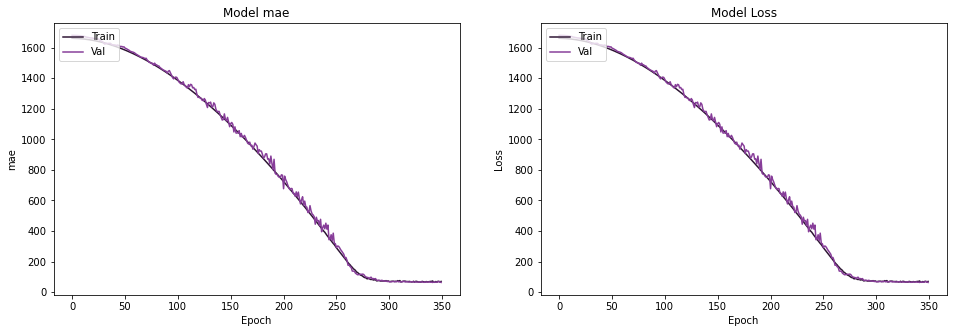

In [8]:
cp = ColorPalette(hue=0.8,value_start=0.2,saturation=0.6)
palette = cp.create_sequential_palette(num_colors=2)
colors = [palette[0],palette[1]]


TrainingHistoryPlotter(history,colors=colors).plot()

In [9]:
train_score = model.predict(X_train)
print("\nMAE on training set:", mean_absolute_error(y_train, train_score),'\n')

y_pred = model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred)
print("\nMAE on test set:", test_mae)

1117/1117 [==============================] - 1s 1ms/step

MAE on training set: 58.49667303616904 

125/125 [==============================] - 0s 1ms/step

MAE on test set: 63.23095801625406


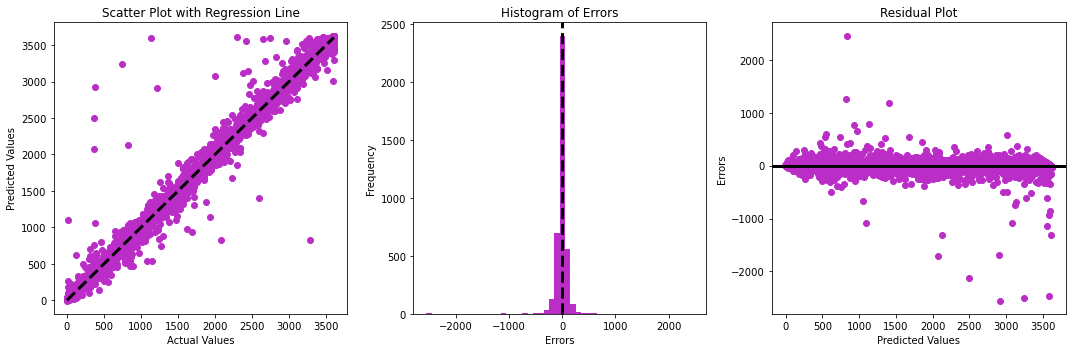

In [10]:
RegressionPlot(y_test,y_pred.reshape(-1),color='#ba2ec7').plot()

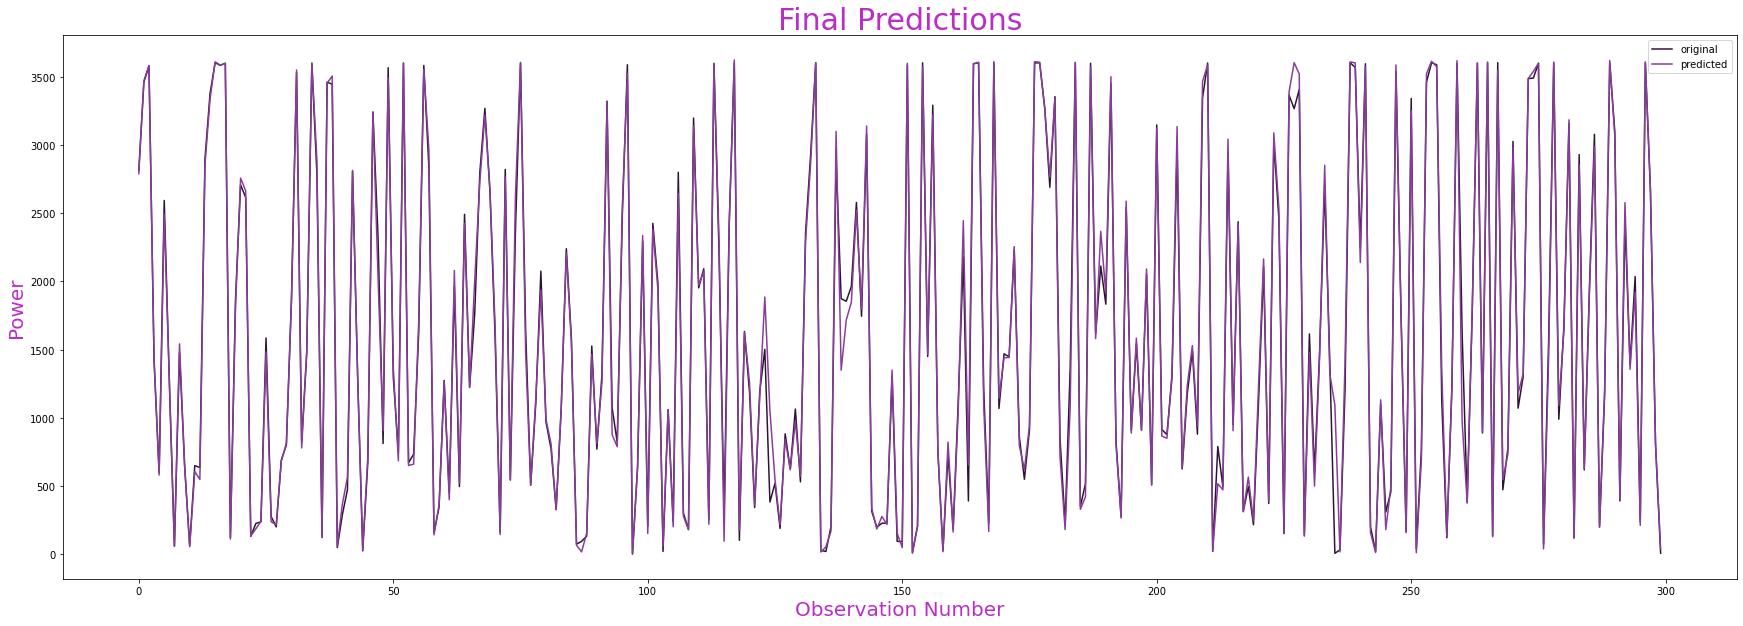

In [11]:
final_predictions = y_test.copy()
final_predictions['predicted'] = y_pred
final_predictions.columns = ['actual','predicted']
final_predictions = final_predictions.sample(300)
cp = ColorPalette(hue=0.8,value_start=0.2,saturation=0.6)
palette = cp.create_sequential_palette(num_colors=2)

number_of_observations = 300

x_ax = range(len(final_predictions[:number_of_observations]))

plt.figure(figsize=(30, 10))
plt.plot(x_ax, final_predictions['actual'][:number_of_observations], label="original", color=palette[0])
plt.plot(x_ax, final_predictions['predicted'][:number_of_observations], label="predicted", color=palette[1])

plt.title("Final Predictions", size=30, color='#ba2ec7')
plt.xlabel('Observation Number', size=20, color='#ba2ec7')
plt.ylabel('Power', size=20, color='#ba2ec7')
plt.legend()

plt.show()

<br><br><br><br><br><br><br><br>
# And This Is The End :)